Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
from glob import glob
import re

***
## Dataset 1

Importing dataset 1 and storing it as dataframe df1

In [2]:
df1 = pd.read_csv('data/data1.txt', index_col='yrmo', parse_dates=True).sort_index()
df1.index.name = 'Date'
#df1 = df1.loc[:'2016',:]
df1.shape

(42074, 7)

Exploratory analysis of df1

In [3]:
df1.info() # Counts for non-null values within medication groups matched except for AntobioPayments & AntibioPatients  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
PhysicianID         42074 non-null object
AdderallPatients    23889 non-null float64
AdderallPayments    23889 non-null float64
AntibioPatients     39829 non-null float64
AntibioPayments     39826 non-null float64
OpioidPatients      12588 non-null float64
OpioidPayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


Imputing the missing AntibioPayments values

In [4]:
df1['AntibioPayments'][df1['AntibioPayments'].isnull() & df1['AntibioPatients'].notnull()] = 0
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
PhysicianID         42074 non-null object
AdderallPatients    23889 non-null float64
AdderallPayments    23889 non-null float64
AntibioPatients     39829 non-null float64
AntibioPayments     39829 non-null float64
OpioidPatients      12588 non-null float64
OpioidPayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df1.describe() # The data is signifcantly right skewed for all variables but shows no unexpected outliers.

,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments
count,23889.000000,2.388900e+04,39829.000000,3.982900e+04,12588.000000,1.258800e+04
mean,4.921972,1.828657e+03,6.378217,2.166645e+04,3.095249,2.980236e+03
std,9.248193,2.293074e+04,12.741038,8.379241e+04,6.943019,6.421729e+04
min,1.000000,-1.177100e+04,1.000000,-9.400000e+03,0.000000,-1.000000e+01
25%,1.000000,4.600000e+01,2.000000,3.020000e+02,1.000000,1.500000e+01
50%,3.000000,2.450000e+02,3.000000,2.906000e+03,2.000000,1.220000e+02
75%,5.000000,8.580000e+02,6.000000,1.430000e+04,3.000000,4.410000e+02
max,341.000000,1.732264e+06,285.000000,2.423404e+06,318.000000,2.823021e+06


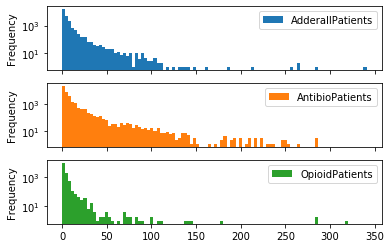

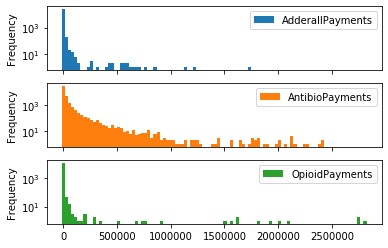

In [6]:
df1.loc[:,['AdderallPatients','AntibioPatients','OpioidPatients']].plot(kind='hist',subplots=True,bins=100,log=True)
df1.loc[:,['AdderallPayments','AntibioPayments','OpioidPayments']].plot(kind='hist',subplots=True,bins=100,log=True)
plt.show()

Creating three new dataframes, for Adderall, Opioid and Antibiotic prescribers, respectively. Dropping null values and summarizing each new dataframe by month

In [7]:
#df1_Adderall = df1.loc[:,['PhysicianID','AdderallPatients','AdderallPayments']].dropna()
#df1_Adderall_agg = df1_Adderall.groupby('Date')['AdderallPatients','AdderallPayments'].sum()
#df1_Adderall_agg

#df1_Adderall = df1.loc[:,['PhysicianID','AdderallPatients','AdderallPayments']].dropna()
df1_adderall = df1.groupby('Date')['AdderallPatients','AdderallPayments'].sum()
df1_antibio = df1.groupby('Date')['AntibioPatients','AntibioPayments'].sum()
df1_opioid = df1.groupby('Date')['OpioidPatients','OpioidPayments'].sum()
df1_adderall.tail(10)

,AdderallPatients,AdderallPayments
Date,,
2017-01-01,2834.0,1790893.0
2017-02-01,2499.0,2247098.0
2017-03-01,2430.0,801030.0
2017-04-01,1873.0,835075.0
2017-05-01,2103.0,480972.0
2017-06-01,2124.0,517995.0
2017-07-01,1656.0,468758.0
2017-08-01,1581.0,445137.0
2017-09-01,1257.0,350291.0


Entries for '2017-10' seem incomplete and may need to be supressed in subsequent analysis 

***
## Dataset 2

Importing datasets, concatenating and storing as dataframe df2

In [8]:
filenames = glob('data/PartD*.txt')
years = ['2014', '2015', '2016', '2017']
dataframes = []
chunk = 10**4
for year,filename in zip(years,filenames):
    reader = pd.read_csv(filename, sep='\t', chunksize = chunk)
    for chunk_df in reader:
        chunk_df['year'] = year
        dataframes.append(chunk_df)

df2 = pd.concat(dataframes, sort=False).set_index('npi')
df2.shape

(4469679, 84)

In [9]:
df2.head()

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,...,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,year
npi,,,,,,,,,,,,,,,,,,,,,
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,...,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266,2014
1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,...,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538,2014
1003000159,VOGES,MARSHA,S,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
1003000167,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362,2014
1003000282,BLAKEMORE,ROSIE,K,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469679 entries, 1003000126 to 1992999882
Data columns (total 84 columns):
nppes_provider_last_org_name        object
nppes_provider_first_name           object
nppes_provider_mi                   object
nppes_credentials                   object
nppes_provider_gender               object
nppes_entity_code                   object
nppes_provider_street1              object
nppes_provider_street2              object
nppes_provider_city                 object
nppes_provider_zip5                 float64
nppes_provider_zip4                 float64
nppes_provider_state                object
nppes_provider_country              object
specialty_description               object
description_flag                    object
medicare_prvdr_enroll_status        object
total_claim_count                   int64
total_30_day_fill_count             float64
total_drug_cost                     float64
total_day_supply                    int64
bene_count   

In [11]:
# Initial exploratory statistical analysis to investigate outliers
df2.describe()

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,4.469445e+06,3.950273e+06,4.469679e+06,4.469679e+06,4.469679e+06,4.469679e+06,3.935246e+06,3.499596e+06,3.499596e+06,3.499596e+06,...,3.101946e+06,2.080544e+06,1.477303e+06,1.984060e+06,1.541327e+06,3.227753e+06,1.452348e+06,2.589176e+06,2.589176e+06,3.935246e+06
mean,4.806602e+04,3.781267e+03,1.305766e+03,1.942933e+03,1.251362e+05,5.389819e+04,1.540157e+02,1.268990e+03,1.986144e+03,1.077771e+05,...,7.681676e+01,1.720787e+02,2.911609e+01,4.642288e+00,2.622565e+01,2.370782e-01,1.282276e+00,1.451119e+02,6.510854e+01,1.476258e+00
std,3.031069e+04,2.251558e+03,3.139943e+03,4.547981e+03,3.380184e+05,1.276015e+05,1.985465e+02,2.857082e+03,4.317755e+03,2.542062e+05,...,9.291940e+01,1.923222e+02,6.021685e+01,3.554039e+01,8.383361e+01,4.114569e+00,6.399938e+00,1.745935e+02,8.462852e+01,6.804732e-01
min,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.989000e-01
25%,2.120100e+04,2.048000e+03,5.300000e+01,6.200000e+01,1.582115e+03,9.550000e+02,3.300000e+01,6.800000e+01,8.000000e+01,2.186157e+03,...,2.300000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01,2.000000e+01,1.068100e+00
50%,4.504000e+04,3.339000e+03,1.980000e+02,2.323000e+02,9.928970e+03,4.514000e+03,8.400000e+01,2.350000e+02,2.878000e+02,1.341678e+04,...,4.700000e+01,1.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.700000e+01,4.000000e+01,1.307000e+00
75%,7.670500e+04,5.147000e+03,9.930000e+02,1.353600e+03,9.640037e+04,3.645700e+04,2.050000e+02,1.074000e+03,1.573200e+03,1.001162e+05,...,9.700000e+01,2.380000e+02,3.400000e+01,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,1.950000e+02,7.900000e+01,1.679100e+00
max,9.992900e+04,9.999000e+03,4.472880e+05,4.479605e+05,2.645885e+07,5.634058e+06,3.996500e+04,3.791620e+05,3.797510e+05,1.342742e+07,...,1.655700e+04,2.531600e+04,3.592000e+03,4.309000e+03,1.135300e+04,4.020000e+02,9.950000e+02,2.813900e+04,1.182600e+04,1.164220e+01


In [12]:
# Making a copy of the original dataframe
df2_clean = df2.copy() 

Initial removal of unnecessary character columns (example street address, names, middle initials and flags) based on instructions and recommendations from the data source documentation https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf

This process will be repeated when columns are further analyzed for redundancy and relevancy to the response variable

In [13]:
# Removing unnecessary columns from the dataframe
pattern1 = re.compile('suppress')
pattern2 = re.compile('nppes')
to_remove = [i for i in df2.columns if pattern1.findall(i) or pattern2.findall(i)] + ['description_flag']
to_remove = [i for i in to_remove if i not in ('nppes_provider_gender','nppes_provider_country',
                                               'nppes_provider_zip5','nppes_provider_state')]

to_remove # List of columns to be removed

['nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip4',
 'ge65_suppress_flag',
 'bene_count_ge65_suppress_flag',
 'brand_suppress_flag',
 'generic_suppress_flag',
 'other_suppress_flag',
 'mapd_suppress_flag',
 'pdp_suppress_flag',
 'lis_suppress_flag',
 'nonlis_suppress_flag',
 'antipsych_ge65_suppress_flag',
 'antipsych_bene_ge65_suppress_flg',
 'description_flag']

In [14]:
df2_clean = df2_clean.drop(to_remove,axis=1)

In [15]:
df2_clean.shape

(4469679, 63)

Counting null values within columns

In [16]:
df2_clean.isnull().sum()

nppes_provider_gender                    63
nppes_provider_zip5                     234
nppes_provider_state                      0
nppes_provider_country                    0
specialty_description                     0
medicare_prvdr_enroll_status              0
total_claim_count                         0
total_30_day_fill_count                   0
total_drug_cost                           0
total_day_supply                          0
bene_count                           534433
total_claim_count_ge65               970083
total_30_day_fill_count_ge65         970083
total_drug_cost_ge65                 970083
total_day_supply_ge65                970083
bene_count_ge65                     1974093
brand_claim_count                   1890317
brand_drug_cost                     1890317
generic_claim_count                 1213086
generic_drug_cost                   1213086
other_claim_count                   1057739
other_drug_cost                     1057739
mapd_claim_count                

The 'nppes_provider_zip5' missing values are associated with non-US claims. The zip code will be imputed with the integer '99999' and the non-US countries will be replaced with 'non-US'. 

Likewise, the 'nppes_provider_gender' column has 63 null values, which are associated with npis that are not actual physicians but institutions. Hence, the missing gender entries will be replaced with the string 'X'.

The missing values in the numerical columns occur when the Medicare PartD total claim or total beneficiary count was less than 11 as well as when the subcategory counts are less than 11. For example, if the total count claim count is 9, all subsequent subcategories like brand_claim_count, generic_claim_count, mapd_claim_count, etc. will be suppressed. The total claim count was never null and did not require imputation. However, in situations where the total beneficiary count or 'bene_count' was less than 11 the missing values were imputed with the integer '5'.

However, since the subsequent subcategory volume counts and costs are fractions of the initial totals (i.e. 'total_claim_count', 'total_drug_cost', 'total_day_supply' and 'bene_count') the missing values in the subactegory numerical columns can be calcualted using the difference between the total and other member(s) of the subcategory. Rather than do this for every row, an average multiplier (fraction) was determined for each subcategory column relative to the total. About 53000 rows with the least number of missing values were randomly selected to calculate the multipliers.

Four columns 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score' were imputed using their column means. 

The methods used for imputing missing values were based on the data limitation guidelines document that accompanied the datasets https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf 

In [17]:
# Replacing entries for non-US countries with the the string 'non-US'
df2_clean['nppes_provider_country'] = df2_clean['nppes_provider_country'].map(lambda x: 'non-US' if x != 'US' else x)

# Imputing the string 'X' for missing 'nppes_provider_gender' entries
df2_clean['nppes_provider_gender'] = df2_clean['nppes_provider_gender'].fillna('X')

# Imputing the integer '99999' for missing 'nppes_provider_zip5' entries    
df2_clean['nppes_provider_zip5'] = df2_clean['nppes_provider_zip5'].fillna(99999)

# Imputing the integer '5' for missing entries in 'bene_count' 
df2_clean['bene_count'] = df2_clean['bene_count'].fillna(5)

# Imputing mean values to replace null entries in 'opioid_prescriber_rate','la_opioid_prescriber_rate',
# 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score'
df2_clean['opioid_prescriber_rate'] = df2_clean['opioid_prescriber_rate'].fillna(df2_clean['opioid_prescriber_rate'].mean())
df2_clean['la_opioid_prescriber_rate'] = df2_clean['la_opioid_prescriber_rate'].fillna(df2_clean['la_opioid_prescriber_rate'].mean())
df2_clean['average_age_of_beneficiaries'] = df2_clean['average_age_of_beneficiaries'].fillna(df2_clean['average_age_of_beneficiaries'].mean())
df2_clean['beneficiary_average_risk_score'] = df2_clean['beneficiary_average_risk_score'].fillna(df2_clean['beneficiary_average_risk_score'].mean())

Calculating multiplier values for imputation of null values in subcategory numerical columns 

In [18]:
# Creating a subset dataframe (df_sub) of randomly selected rows with null values > 60
df_sub = df2_clean[df2_clean.notnull().sum(axis=1) > 60]
len(df_sub)

53787

In [19]:
# df_sub.to_csv('df_sub.csv')

df_sub was exported as an excel file to make it easier to see all the columns. The multiplier value for each subcategory was calculated and the excel file was re-imported into a dataframe, 'impute'. 

To read the impute dataframe, using 'brand_claim_count' column as an example, the multiplier is 0.208034, which means that on average, brand_claim_count represents about 21% of the total_claim_count for all npis. Subsequently, the multiplier for mapd_drug_cost 0.395615, which means on average, mapd_drug_cost is about 40% of the total_drug_cost for all npis. 

In [20]:
# importing the file with the calculated values
impute = pd.read_excel('multipliers.xlsx', sheet_name='Sheet1')
impute = impute.set_index('column_name')
impute['total_count'] = impute.total_count.map(lambda x: x.strip())
impute                

,total_count,multiplier
column_name,,
total_claim_count_ge65,total_claim_count,0.826511
total_30_day_fill_count_ge65,total_30_day_fill_count,0.849652
total_drug_cost_ge65,total_drug_cost,0.772285
total_day_supply_ge65,total_day_supply,0.852593
bene_count_ge65,bene_count,0.841039
brand_claim_count,total_claim_count,0.208034
brand_drug_cost,total_drug_cost,0.743894
generic_claim_count,total_claim_count,0.783205
generic_drug_cost,total_drug_cost,0.251573


Method used to impute subcategory numerical columns based on calculated multipliers

In [21]:
for column_name, total_count, multiplier in zip(impute.index, impute['total_count'], impute['multiplier']):
    col_list = []
    for i,j in zip(df2_clean[column_name],df2_clean[total_count]):
            if str(i) == 'nan':
                col_list.append(j * multiplier)
            else:
                col_list.append(i)
    df2_clean[column_name] = col_list

Confirming that all columns no longer have null values

In [22]:
df2_clean.isnull().sum().sum() == 0

True

In [31]:
# Randomly selecting columns to inspect imputation method for accuracy by comparing df2 and df2_clean dataframes
sub_cat = 'generic_claim_count'
total = 'total_claim_count'

print('{:<25} {:<30} {}'.format('df2_' + sub_cat, 'df2_clean_' + sub_cat, total))
for i,j,k in zip(df2[sub_cat][:20], df2_clean[sub_cat][:20], df2[total][:20]):
    print('{:<25} {:<30} {}'.format(i,j,k))    

df2_generic_claim_count   df2_clean_generic_claim_count  total_claim_count
538.0                     538.0                          675
821.0                     821.0                          937
nan                       14.097684289480654             18
41.0                      41.0                           58
14.0                      14.0                           14
364.0                     364.0                          420
87.0                      87.0                           116
35.0                      35.0                           67
4420.0                    4420.0                         5408
4605.0                    4605.0                         5503
nan                       60.30676057166724              77
nan                       40.72664350294411              52
862.0                     862.0                          1204
113.0                     113.0                          135
2635.0                    2635.0                         3347
643.0       

Adding two new columns, 'npi_type_pref' and 'npi_drug_pref', to capture the most prescribed drug type (brand or generic) or drug indication (opioid, antibiotic, antipsych) per physician per year 

In [32]:
npi_type_pref, npi_drug_pref = [],[]
    
for i,j,k,l,m,n,o in zip(df2_clean['total_claim_count'],df2_clean['brand_claim_count'],
                         df2_clean['generic_claim_count'],df2_clean['opioid_claim_count'],
                         df2_clean['la_opioid_claim_count'],df2_clean['antibiotic_claim_count'],
                         df2_clean['antipsych_claim_count_ge65']):
    a = [j/i, k/i]
    b = [l/i, m/i, n/i, o/i]
    maxb = []
        
    if a[0] == a[1]:
        npi_type_pref.append('no_pref')
    elif a[0] > a[1]:
        npi_type_pref.append('brand')
    else:
        npi_type_pref.append('generic')
            
    for index,value in enumerate(b):
        if max(b) == value:
            maxb.append(index)
    
    if len(maxb) > 1:
        npi_drug_pref.append('no_pref')
    else:
        if maxb[0] == 0:
            npi_drug_pref.append('opioid')
        elif maxb[0] == 1:
            npi_drug_pref.append('la_opioid')
        elif maxb[0] == 2:
            npi_drug_pref.append('antibiotic')
        elif maxb[0] == 3:
            npi_drug_pref.append('antipsych')        
            
df2_clean['npi_type_pref'] = npi_type_pref
df2_clean['npi_drug_pref'] = npi_drug_pref
df2_clean.shape                               

(4469679, 65)

In [33]:
# Inspecting newly created columns
df2_clean['npi_type_pref'].value_counts(dropna=False)

generic    4288427
brand       176813
no_pref       4439
Name: npi_type_pref, dtype: int64

In [34]:
df2_clean['npi_drug_pref'].value_counts(dropna=False)

antibiotic    2183826
opioid        1801641
no_pref        319740
antipsych      163639
la_opioid         833
Name: npi_drug_pref, dtype: int64